# MODEL EVALUATION: CROSS VALIDATION

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split # data splitting
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve 

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
fitur = ['employ','debtinc','creddebt','othdebt']
target = ['default']

X= bankloan[fitur]
y= bankloan[target]

In [5]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2020)


## Benchmark

In [6]:
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [7]:
warnings.filterwarnings('ignore')

## Accuracy

In [8]:
# data train_val dibagi menjadi berapa bagian
skfold = StratifiedKFold(n_splits=5)

#Evaluate a score by cross-validation
logreg_cv = cross_val_score(logreg, X_train_val, y_train_val)
knn_cv = cross_val_score(knn, X_train_val, y_train_val)
tree_cv = cross_val_score(tree, X_train_val, y_train_val)

In [9]:
print('CrossVal Logreg:' ,logreg_cv)
print('CrossVal KNN:' ,knn_cv)
print('CrossVal Tree:' ,tree_cv)

CrossVal Logreg: [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CrossVal KNN: [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CrossVal Tree: [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


### pakai DecTree ga terlalu stabil

In [10]:
print('CrossVal Logreg:' ,logreg_cv.std())
print('CrossVal KNN:' ,knn_cv.std())
print('CrossVal Tree:' ,tree_cv.std())

CrossVal Logreg: 0.020824828195876083
CrossVal KNN: 0.024872121923543065
CrossVal Tree: 0.057753434388557956


### pilih standar deviasi yg paling kecil, dengan kata lain lebih stabil

In [11]:
print('CrossVal Logreg:' ,logreg_cv.mean())
print('CrossVal KNN:' ,knn_cv.mean())
print('CrossVal Tree:' ,tree_cv.mean())

CrossVal Logreg: 0.8
CrossVal KNN: 0.7428571428571429
CrossVal Tree: 0.7714285714285716


### pilih mean yg paling besar (score paling bagus)

## Recall

coba pakai recall untuk confusion metrics evaluation nya

In [12]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv=skfold, scoring='recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv=skfold, scoring='recall')
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv=skfold, scoring='recall')

In [13]:
print('CrossVal Logreg:' ,logreg_cv)
print('CrossVal KNN:' ,knn_cv)
print('CrossVal Tree:' ,tree_cv)
print()

print('CrossVal Logreg:' ,logreg_cv.std())
print('CrossVal KNN:' ,knn_cv.std())
print('CrossVal Tree:' ,tree_cv.std())
print()

print('CrossVal Logreg:' ,logreg_cv.mean())
print('CrossVal KNN:' ,knn_cv.mean())
print('CrossVal Tree:' ,tree_cv.mean())

CrossVal Logreg: [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CrossVal KNN: [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CrossVal Tree: [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]

CrossVal Logreg: 0.08992003317520893
CrossVal KNN: 0.06021759987018779
CrossVal Tree: 0.13481616986286768

CrossVal Logreg: 0.46551724137931033
CrossVal KNN: 0.3213793103448276
CrossVal Tree: 0.4577011494252874


### Log regresi secara general memiliki score terbaik dan stabil

# Flexible Metrics

dibuat function

- contohnya: model dengan LogReg dan metricnya dengan f1

In [14]:
# model dan metric bisa diganti sesuai kebutuhan
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
metric = 'f1' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
  return model_cv


In [15]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())


In [16]:
model_cv = model_evaluation_cv(model, 'f1')

In [17]:
print_result(model_cv)

CV score [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV score mean 0.543564482325905
CV score std 0.06927688261828344


### Model Performance in Test Set

In [18]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_val, y_train_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)

In [20]:
print('recall',recall_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
print('f1',f1_score(y_test, y_pred))

recall 0.4864864864864865
precision 0.782608695652174
f1 0.6000000000000001


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [22]:
# from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [23]:
# from sklearn.metrics import roc_auc_score, precision_recall_curve 

In [24]:
roc_auc_score(y_test, y_pred)

0.718971398583049

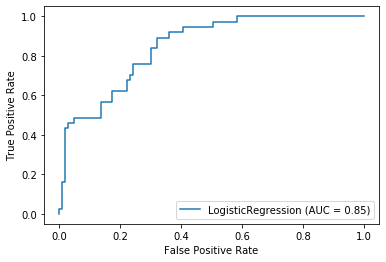

In [25]:
plot_roc_curve(logreg, X_test, y_test)

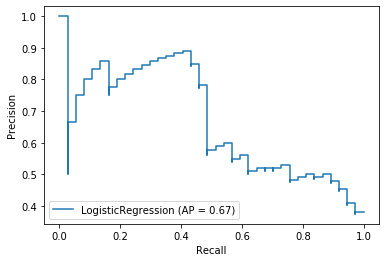

In [26]:
plot_precision_recall_curve(logreg, X_test, y_test)

#  Simple Hyperparameter Tuning

In [27]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    stratify = y_train_val,
    test_size = 0.25, # 25 % of train_val set equal to 20 % of all data set 
    random_state = 2020)


In [28]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001] 
# C = 1 is our benchmark
# Cfloat, default=1.0
# Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
skfold = StratifiedKFold(n_splits = 5)

best_score = 0
cv_score_validation_fold = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  cv_score = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring = 'f1').mean()
  cv_score_validation_fold.append(cv_score)

  if cv_score > best_score:
    best_score = cv_score
    best_paramas = {'C':i}


In [29]:
print('best_score', best_score)
print('best_paramas', best_paramas)


best_score 0.5563225088777649
best_paramas {'C': 0.05}


In [30]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

training_score = []
validation_score = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  logreg.fit(X_train,y_train)

  y_predict_train = logreg.predict(X_train)
  training_score.append(f1_score(y_train,y_predict_train))

  y_predict_val = logreg.predict(X_val)
  validation_score.append(f1_score(y_val,y_predict_val))


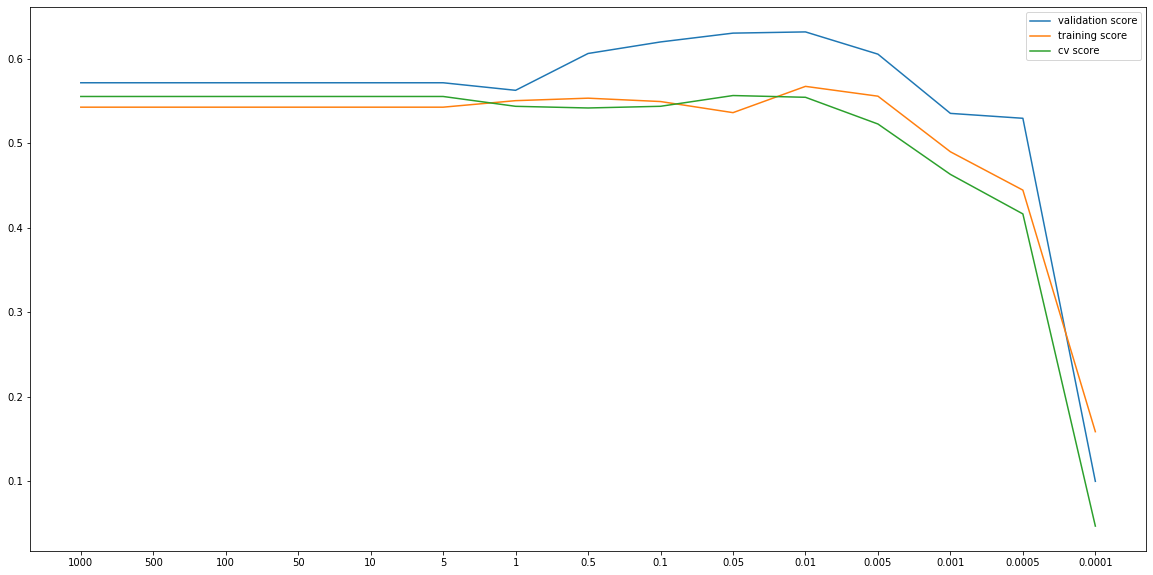

In [31]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,validation_score)
sns.lineplot(length,training_score)
sns.lineplot(length,cv_score_validation_fold)
plt.legend(['validation score','training score','cv score'])
plt.xticks(length,hyperparam_c)
plt.show()


## Final Result Comparison: Simple Hyperparameter Tuning

In [32]:
### Final Model Performance Before
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



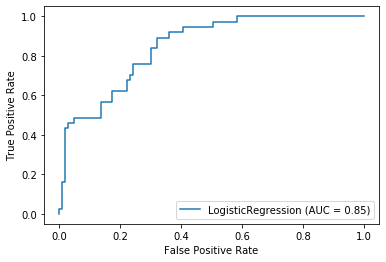

In [33]:
plot_roc_curve(logreg, X_test, y_test)

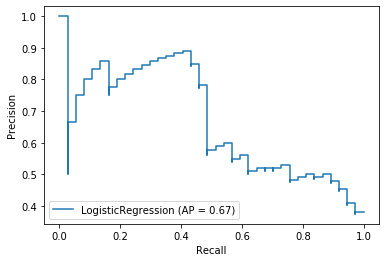

In [34]:
plot_precision_recall_curve(logreg, X_test, y_test)

In [35]:
### Final Model Performance After
logreg = LogisticRegression(solver = 'liblinear', C = 0.05)
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



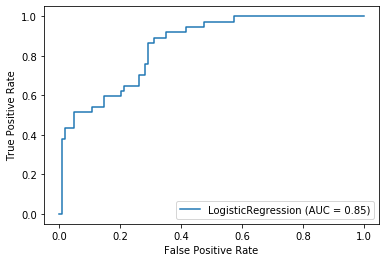

In [36]:
plot_roc_curve(logreg, X_test, y_test)

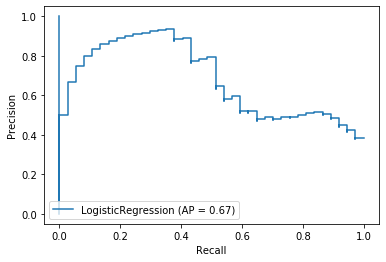

In [37]:
plot_precision_recall_curve(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
2. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
2. more feature engineering
3. add another hyperprameter, (we are gonna try this)

# Hyperparameter Tuning: 
# Grid Search and Randomize Search

In [38]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [39]:
hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], 
    # benck mark 1 C = 1 
    # bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}


In [40]:
skfold = StratifiedKFold(n_splits = 5)

logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)

random_search=RandomizedSearchCV(
    logreg,
    param_distributions= hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)


In [41]:
# skfold = StratifiedKFold(n_splits = 5)

# logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)

# grid_search = GridSearchCV(
#     logreg, # model to tune
#     param_grid = hyperparam_space, # hyperparameter space
#     cv = skfold, # evaluation method
#     scoring = 'f1', # metrics
#     n_jobs = -1 # use all cores
# )


In [42]:
random_search.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=2020,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5,
                                              0.1, 0.05, 0.01, 0.005, 0.001,
                                          

In [43]:
print('best_score',random_search.best_score_)
print('best_params',random_search.best_params_)

best_score 0.5563225088777649
best_params {'max_iter': 500, 'C': 0.05}


In [44]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018324,0.000268,0.024039,0.008316,200,0.5,"{'max_iter': 200, 'C': 0.5}",0.566038,0.439024,0.653846,0.530612,0.518519,0.541608,0.069816,7
1,0.026639,0.009783,0.019125,0.012296,100,0.01,"{'max_iter': 100, 'C': 0.01}",0.500000,0.627451,0.576271,0.576923,0.490566,0.554242,0.051684,5
2,0.026927,0.013254,0.010710,0.003391,100,0.1,"{'max_iter': 100, 'C': 0.1}",0.538462,0.444444,0.629630,0.560000,0.545455,0.543598,0.059214,6
3,0.029442,0.020735,0.010200,0.002716,200,10,"{'max_iter': 200, 'C': 10}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,2
4,0.040750,0.017331,0.012215,0.002247,1000,0.0001,"{'max_iter': 1000, 'C': 0.0001}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,10
5,0.052157,0.023429,0.011911,0.002762,100,100,"{'max_iter': 100, 'C': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,2
6,0.048556,0.024031,0.023110,0.012079,300,5,"{'max_iter': 300, 'C': 5}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,2
7,0.044629,0.056908,0.008711,0.002267,500,0.05,"{'max_iter': 500, 'C': 0.05}",0.528302,0.530612,0.607143,0.560000,0.555556,0.556323,0.028436,1
8,0.022510,0.007328,0.010617,0.002642,1000,0.5,"{'max_iter': 1000, 'C': 0.5}",0.566038,0.439024,0.653846,0.530612,0.518519,0.541608,0.069816,7
9,0.026837,0.011231,0.010910,0.001807,500,0.005,"{'max_iter': 500, 'C': 0.005}",0.461538,0.603774,0.566667,0.510638,0.470588,0.522641,0.054969,9


### This method still resulted in C = 0.05 max_iter = 100 which is basically the same. so no effect in adding max_iter. you can use another method or more FE.

## Final Result Comparison: Hyperparameter Tuning Grid Search 

In [45]:
### Final Model Performance Before

In [46]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



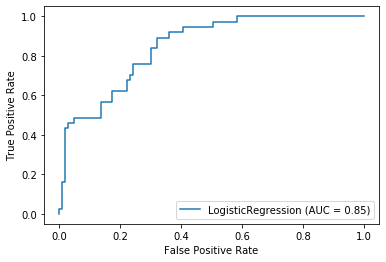

In [47]:
plot_roc_curve(logreg, X_test, y_test)

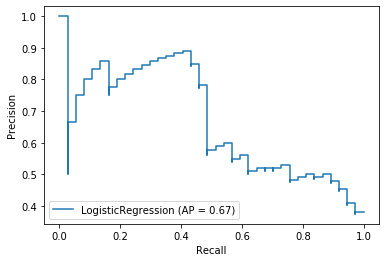

In [48]:
plot_precision_recall_curve(logreg, X_test, y_test)

In [49]:
### Final Model Performance After

In [50]:
random_search.best_estimator_

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
logreg = random_search.best_estimator_
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



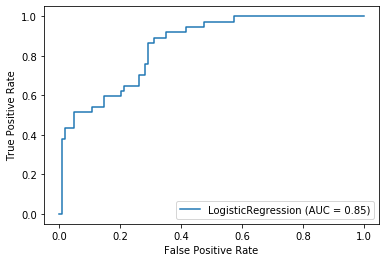

In [52]:
plot_roc_curve(logreg, X_test, y_test)

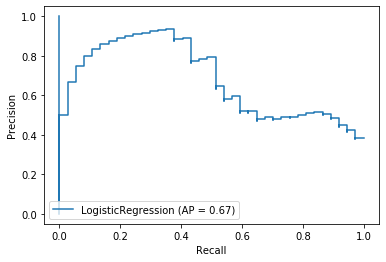

In [53]:
plot_precision_recall_curve(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
2. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
2. more feature engineering
3. add another hyperparameter, (we already try this, either try again or try 1 or 2)

#  TIPS dataset

In [111]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Split

In [112]:
X = pd.get_dummies(tips.drop('tip', axis=1))
y = tips['tip']

In [113]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 2020
)

## Model Evaluation: Benchmark

In [114]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 2020)
linreg = LinearRegression()


In [115]:
from sklearn.metrics import SCORERS

In [116]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

pakai neg_mean_squared_error, karena cross validation akan mencari evaluation metric tertinggi sebagai evaluasi terbaik,
sementara pada mse, semakin rendah mse, semakin baik.

In [117]:
model_cv = cross_val_score(tree, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [118]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV score mean -1.2432694552627068
CV score std 0.28004351146399903


In [119]:
model_cv = cross_val_score(linreg, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [120]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]
CV score mean -1.132021480300669
CV score std 0.3393316319526624


## Model Performance
kita oakai decision tree regressor

In [121]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(X_train_val, y_train_val)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [122]:
y_pred = tree.predict(X_test)

In [123]:
print(mean_squared_error(y_test, y_pred))

1.48088039461045


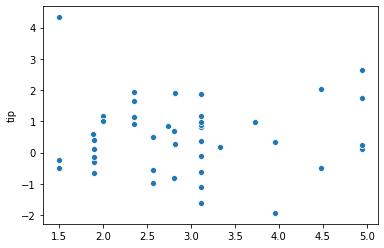

In [124]:
residuals = y_test - y_pred

sns.scatterplot(y_pred, residuals)

## Hyperparameter Tuning

In [125]:
hyperparam_space = {
    'min_samples_leaf':[1,5,10,15,20,50], # benck mark min_samples_leaf = 1
    'max_depth':[2,3,4,5,6,7], # bench mark max_depth = 5
    'criterion':['mse','mae']
}


1. min_samples_leaf 6 hyperparameters
2. max_depht 5 hyperparameters
3. CV 5 fold

so, this step will train model 655 = 150 times

In [126]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 2020)

randomized_search = RandomizedSearchCV(
    tree, # model to tune
    param_distributions = hyperparam_space, # hyperparameter space
    n_iter = 20,
    cv = 5, # evaluation method
    scoring = 'neg_mean_squared_error', # metrics
    random_state = 2020,
    n_jobs = -1 # use all cores
)


In [127]:
randomized_search.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse', max_depth=5,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=2020,
                                                   splitter='best'),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   p

In [128]:
print('best_score',randomized_search.best_score_)
print('best_params',randomized_search.best_params_)

best_score -0.9829038972124049
best_params {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}


In [129]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013400,0.001357,0.004802,0.001830,1,2,mae,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.738330,-0.851707,-1.323954,-1.509013,-1.356648,-1.155931,0.303358,3
1,0.017999,0.003850,0.018202,0.022929,5,7,mse,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.266981,-0.767827,-1.325200,-2.239966,-1.472244,-1.414444,0.475952,19
2,0.018600,0.012308,0.020197,0.028922,5,4,mse,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-1.144108,-0.817462,-1.375826,-2.197390,-1.445703,-1.396098,0.456784,18
3,0.042812,0.031784,0.021021,0.027563,20,2,mae,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",-0.722048,-1.093600,-1.182453,-1.955167,-1.356648,-1.261983,0.403899,6
4,0.053880,0.033116,0.017145,0.025000,5,2,mae,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",-0.722048,-1.093600,-1.215538,-1.960931,-1.356648,-1.269753,0.404778,8
5,0.026363,0.018345,0.007799,0.004533,50,7,mse,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
6,0.061238,0.041733,0.006798,0.001328,1,4,mse,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",-0.771622,-0.665101,-1.593723,-1.029129,-0.854944,-0.982904,0.327795,1
7,0.021109,0.017293,0.025637,0.039543,5,3,mse,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.987999,-0.897975,-1.295115,-2.212884,-1.413923,-1.361579,0.466126,14
8,0.035434,0.027224,0.017017,0.025529,20,4,mae,"{'min_samples_leaf': 20, 'max_depth': 4, 'crit...",-0.805774,-1.082392,-1.204603,-1.997315,-1.332621,-1.284541,0.396694,9
9,0.038435,0.024852,0.010332,0.009138,1,2,mse,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.816130,-0.882642,-1.424336,-1.108872,-0.924132,-1.031222,0.219261,2


### try again, change random_state in randomized_search

## Final Result Comparison

### Before Tuning

In [130]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(X_train_val, y_train_val)

y_pred = tree.predict(X_test)

print(mean_squared_error(y_test, y_pred))

1.4808803946104498


### After Tuning

In [131]:
tree = randomized_search.best_estimator_
tree.fit(X_train_val, y_train_val)

y_pred = tree.predict(X_test)

print(mean_squared_error(y_test, y_pred))

1.3093536770005814


### Jadi, hyperparameter tuning mengurangi mse dari 1.48 menjadi 1.31
(berarti hyperparameter tuning membantu memperbaiki model)